## **Data Analysis and Visualization** 
### Dishant Goti (201801449)

### Siddharth Moradiya (201801470)

# **Analyze E-commerce Customer Dataset using Linear Regression.** 

E-commerce Company sells clothes online. They try to identify if a company should focus on improving mobile app experience or on improving website experience for their customers.

Note that the time is given in minutes for all numerical columns except for Length of Membership (years) and Yearly Amount Spent (Dollars)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Retrieving the Data From the Dataset


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/DAV_project/Ecommerce Customers')

In [4]:
customers.info() #To check null values present or not in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Let's see what this data looks like.

In [5]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### **Hypothesis:** Time on App and Time on Website are the two factors that drive Yearly AmountSpent
To test this hypothesis, let's begin by exploring the data.

# Exploratory Data Analysis (EDA)

#### Histogram and Cumulative Distribution Function

We will start with mapping the ECDF for our target variable (Yearly Amount Spent)

The ECDF gives us a sense for the probabilitistic distribution of the data. 

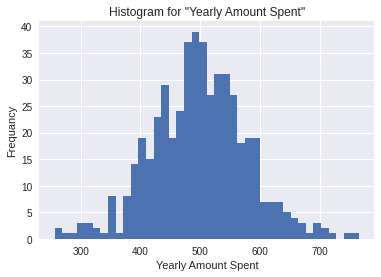

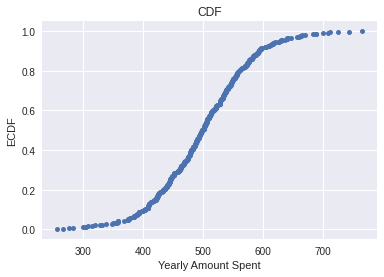

In [8]:
#creating a function to perform ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n    
    return x,y
plt.figure()
plt.hist(customers['Yearly Amount Spent'],bins=40)
_ = plt.title('Histogram for "Yearly Amount Spent"')
_ = plt.xlabel('Yearly Amount Spent')
_ = plt.ylabel('Frequancy')
plt.savefig('1.png')
plt.show()

plt.figure()
#plotting the ecdf
x, y = ecdf(customers['Yearly Amount Spent'])
_ = plt.plot(x,y, marker = '.',linestyle = 'none',markersize=10)
_ = plt.title('CDF')
_ = plt.xlabel('Yearly Amount Spent')
_ = plt.ylabel('ECDF')
plt.savefig('2.png')
plt.show()

#### Correlation matrix for given dataset

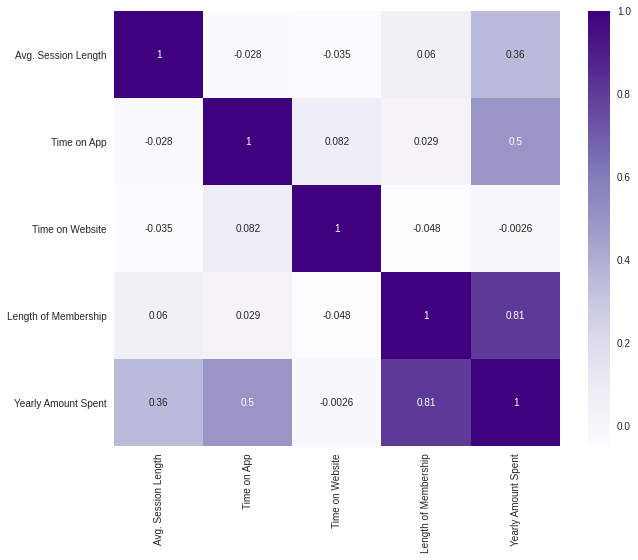

In [9]:
d1 = customers
correlation = d1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='Purples')
plt.savefig('3.jpg')
plt.show()

Here from the above heatmap we can see that correlation between two parameter 'Yearly Amount Spent' and 'Time on App' is positive (0.5) and significant but correlation between 'Time on Website' and 'Yearly Amount Spent' is negligible (close to 0).




#### Let's Explore relation between 'Yearly Amount Spent' and 'Time on App' and 'Time on Website' and 'Yearly Amount Spent'.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Correlation of 'Time on Website' and 'Yearly Amount Spent' is : ' -0.0026408446721589104


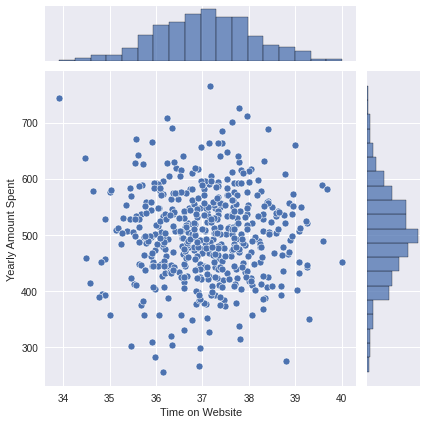

In [10]:
fig = sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])
plt.savefig('4.png')
print("Correlation of 'Time on Website' and 'Yearly Amount Spent' is : '",np.corrcoef(customers['Time on Website'],customers['Yearly Amount Spent'])[0,1])

We can see that the correlation is very low, at almost 0, and also the plot tells us the same.Here we have expected that there to be some correlation between time spent on the websiteand the yearly amount spent but here correlation value is nearly 0.  So, even without anyfurther analysis, we can say that Time on Website is not a driver for Yearly Amount Spent.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Correlation of 'Time on App' and 'Yearly Amount Spent' is : ' 0.49932777005345047


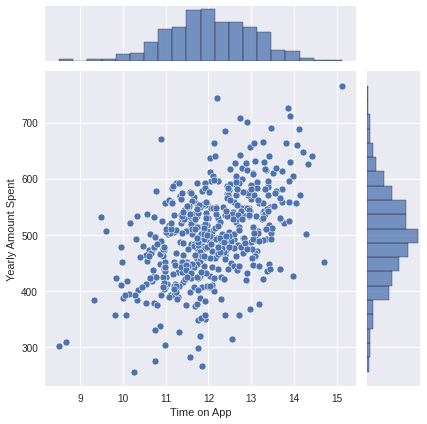

In [11]:
#Let's see if Time on the app matters
fig = sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])
plt.savefig('5.png')
print("Correlation of 'Time on App' and 'Yearly Amount Spent' is : '",np.corrcoef(customers['Time on App'],customers['Yearly Amount Spent'])[0,1])

We see a larger correlation coefficient and the plot shows a more positive correlation,  specially in comparison to the Time on Website plot.

#### Pairplot of data

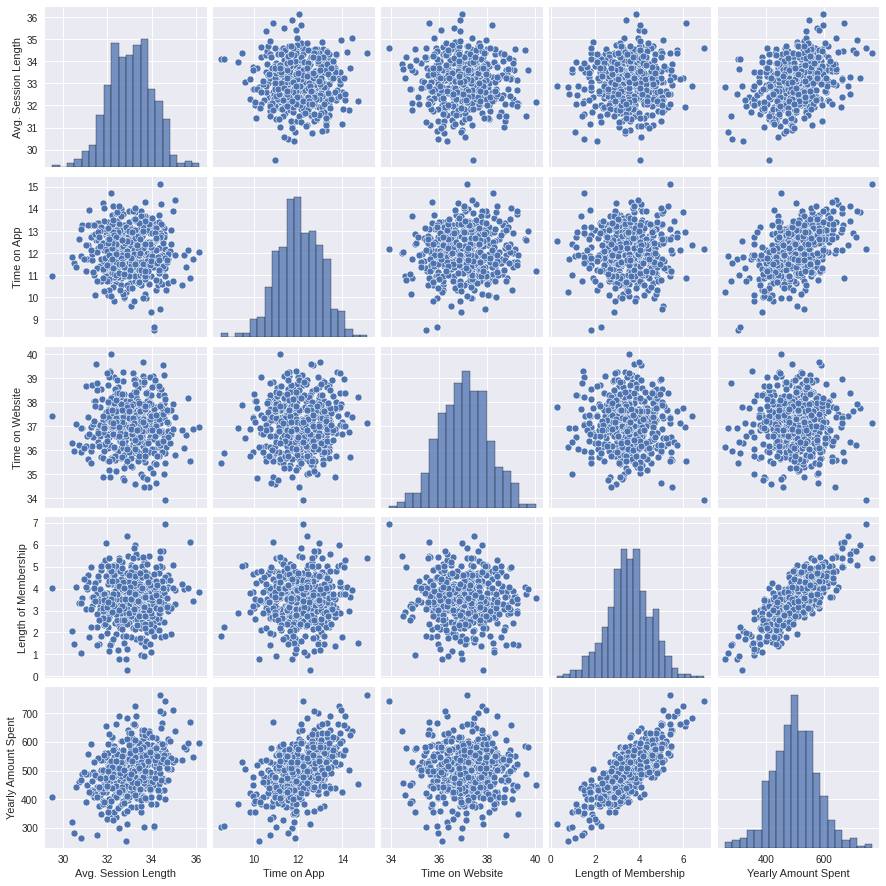

In [12]:
sns.pairplot(customers)
plt.savefig('6.png')

From the above pairplot we can see that yearly amount spent feature is correlated with thefeatures Avg.  Session Length, Length of Membership and Time on App.  Here we can seethat avg.  Session Length, Time on App is slightly correlated and Length of Membership isheavily correlated with the Yearly Amount Spent.

Here from the pair plot we can also observe that all of our other categories do not appearobviously correlated with one another, making a linear regression analysis model and try topredict Yearly Amount Spent.

From the above pair plot Length of membership looks like a linear relationship with theyearly amount spent, so let’s do Linear Regression analysis for both parameter.

# Linear Regression

In [13]:
def root_mean_square_error(x,y):
  sum = 0
  for i in range(len(x)):
    sum += (x[i]-y[i])**2
  return math.sqrt(sum/len(x))

def estimate_coef(x, y): 
  n = np.size(x)  
  m_x, m_y = np.mean(x), np.mean(y) 
  b_1 = (np.sum(y*x) - n*m_y*m_x) / (np.sum(x*x) - n*m_x*m_x) 
  b_0 = m_y - b_1*m_x 
  
  return b_0,b_1 
def plot_regression_line(x, y, b):
  plt.figure(figsize=(8,6)) 
  n = np.size(x)
  plt.scatter(x, y,s=70) 
  y_pred = b[0] + b[1]*x 
  plt.plot(x, y_pred,c='r')
  plt.xlabel('Length of Membership') 
  plt.ylabel('Yearly Amount Spent') 
  plt.title('Linear Regression')
  plt.savefig('7.png')
  plt.show()
  return 

In [14]:
x=customers['Length of Membership']
y=customers['Yearly Amount Spent']

B0:  272.399786058034
B1:  64.2186843155828


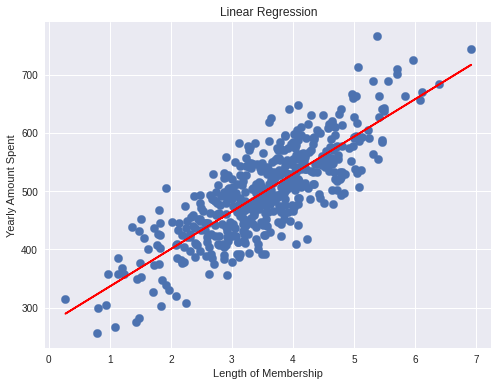

In [15]:
B0,B1 =estimate_coef(x,y)
print("B0: ",B0)
print("B1: ",B1)
plot_regression_line(x, y, [B0,B1])

Here we can clearly see that this simple linear fit is good for the parameter "Yearly AmountSpent" and "Length of Membership". The longer you stay a member, the larger your YearlyAmount Spent. Also we can relate this parameter with the real life example for any kind of membership (Here membership in clothing company).

We  have  taken  only  one  parameter  effect  on  yearly  amount  spent.   Now  let’s  add  otherfeatures (Avg. Session Length, Time on App, Time on Website, Length of Membership) andsee how it effects on yearly amount spent


# Training and Testing Data
we are interested in creating a model that can help us make prediction decisions for the pa-rameter yearly amount spent


In [16]:
#we will use all numerical columns for the linear regression input
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [17]:
y = customers['Yearly Amount Spent']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

# Training the Model
Now to train the model with the training data

In [20]:
#importing Linear Regression functionality from sklearn
from sklearn.linear_model import LinearRegression 

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#quick check of our coefficients to make sure the numbers look appropriate before evaluating our model
lm.coef_
print("Coeffs are \nAvg. Session Length: {0}, \nTime on App : {1} , \nTime On Website: {2}, \nLength of Membership: {3}".format(lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3]))
print("\nIntercept : ",lm.intercept_)

Coeffs are 
Avg. Session Length: 25.981549723495792, 
Time on App : 38.59015875311409 , 
Time On Website: 0.19040527751100633, 
Length of Membership: 61.27909654482186

Intercept :  -1047.9327822502387


# Predicting Test Data
Now we are going to use testing data and feed this data to the linear regression model and compare it with its original value.

In [24]:
#predicting y values (Yearly Amount Spent) with our model using the data we reserved for testing
predictions = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


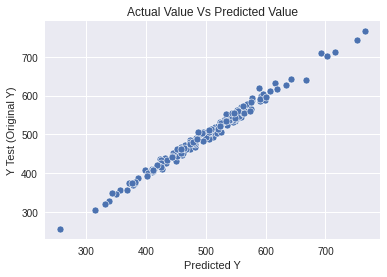

In [31]:
#plotting the real values versus the predicted values
_ = sns.scatterplot(predictions,y_test)
_ = plt.xlabel('Predicted Y')
_ = plt.ylabel('Y Test (Original Y)')
_ = plt.title('Actual Value Vs Predicted Value')
plt.savefig('8.png')

we can see the mostly straight diagonal line being a perfect prediction of the testing datathat means our model predicts data well.

# Evaluating the Model
The explained variance score (R2) is used to determine how much variance the model explains.
The explained variance score (R^2) is used to determine how much variance your model explains - the closer to 1, the better the model.

Other common calculations to measure the performance of a regression model is Root Mean Squared Error (RMSE). Here we used RMSE to calculate the error between Actual value and predicted value of the yearly amount spent.

In [26]:
#pulling metrics functionalities our of sklearn
from sklearn import metrics

In [27]:
print('R^2:', metrics.explained_variance_score(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.9890771231889607
RMSE: 8.933815066978644


Our R^2 value is almost 99% which is very good, as our model describes almost 99% of the variance in the sample. Because the other values relate to the error, we want to see all of these values minimized as much as possible. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


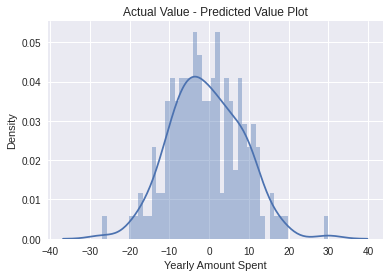

In [30]:
#We want to explore the residuals and we're hoping to see something that is mostly normally distributed. 
sns.distplot((y_test - predictions), bins=50)
plt.title('Actual Value - Predicted Value Plot')
plt.savefig('9.png')

With a low average error compared to the magnitude of the values we are working with, and the residuals plot looking normally distributed, this can be considered a good model. 

# **Conclusion**

In [29]:
#let's look at the coefficients of the model
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


From the above table we can see different coefficient value for different feature. From this table company can decide what should they do to increase their customers. Here we can see that an increase in the Length of Membership (in years) would affect more on the value of our customers for Yearly Amount Spent ($). Next parameter which affects on yearly amount spent is Time on the App. 

**Time spent on App has more impact than Time spent on Website so, here we can say that company should focus on invest money on App because the app provides greater profitability for one more minute increase compared to the time on the website** but it also depends on what the costs of developing the app vs. the website are. It's clear that the website needs more work compared to the time on the app, but it may be more cost effective to continue working on the App instead of bringing the website up to speed. 

Different economic factors would determine which course of action to take, but at least we now have knowledge of the state of our website and our app in terms of yearly spend per customer.

With addition to this, however, Length of Membership was the greatest impact in the amount a customer spent yearly, meaning that the longer the customers stay with the company, the more money the company will make in the long run. So, length of Membership should be included as the economic factors to decide between focusing on their app experience or their website.
